Возьмите датасет Mortality and Water Hardness

В этом датасете содержатся данные по средней годовой смертности на
100000 населения и концентрации кальция в питьевой воде для 61
большого города в Англии и Уэльсе. Города дополнительно поделены на
северные и южные.

In [1]:
import pandas as pd
water_data = pd.read_csv('water.csv')
# water_data.head()
water_data

,Unnamed: 0,location,town,mortality,hardness
0,1,South,Bath,1247,105
1,2,North,Birkenhead,1668,17
2,3,South,Birmingham,1466,5
3,4,North,Blackburn,1800,14
4,5,North,Blackpool,1609,18
...,...,...,...,...,...
56,57,South,Walsall,1527,60
57,58,South,West Bromwich,1627,53
58,59,South,West Ham,1486,122
59,60,South,Wolverhampton,1485,81


Задание 1.
Ответить на вопрос: есть ли связь между жёсткостью воды и средней годовой смертностью?

- Построить точечный график
- Рассчитать коэффициенты корреляции Пирсона и Спирмена
- Построить модель линейной регрессии
- Рассчитать коэффициент детерминации
- Вывести график остатков

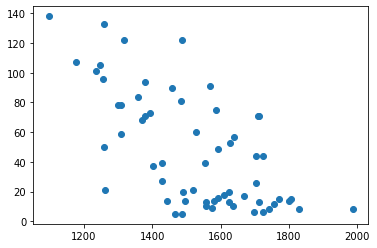

In [5]:
import matplotlib.pyplot as plot

x = water_data['mortality']
y = water_data['hardness']
legend = water_data['location']

plot.scatter(x, y)

In [12]:
from scipy.stats import spearmanr, pearsonr

print('pearson: ', pearsonr(x, y))
print('spearman: ', spearmanr(x, y))

pearson:  (-0.6548486232042465, 1.033133926034952e-08)
spearman:  SpearmanrResult(correlation=-0.6316646189166502, pvalue=4.79546153722838e-08)


Slope: -0.13
Intercept: 249.78


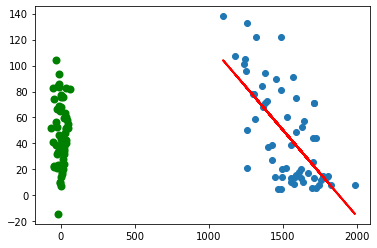

In [27]:
import sklearn.linear_model as lm

xx = water_data[['mortality']].values
yy = water_data['hardness'].values

slr = lm.LinearRegression()
slr.fit(xx, yy)
yy_pred = slr.predict(xx)
print('Slope: {:.2f}'.format(slr.coef_[0]))
print('Intercept: {:.2f}'.format(slr.intercept_))

plot.scatter(xx, yy)
plot.plot(xx, slr.predict(xx), color='red', linewidth=2)

plot.scatter(slr.predict(xx) - yy, slr.predict(xx), color='green', linewidth=2)

In [23]:
import scipy.stats as st
slope, intercept, r_value, p_value, std_err = st.linregress(x, y)
st.linregress(x, y)

LinregressResult(slope=-0.1329245327325784, intercept=249.77692756960676, rvalue=-0.6548486232042465, pvalue=1.0331339260349543e-08, stderr=0.019972027679436)

Задание 2.
Ответить на вопрос: сохраняется ли аналогичная зависимость для северных и южных городов по отдельности?

- Разделить данные на 2 группы
- Повторить аналогичные шаги из пункта 1 для каждой группы по отдельности

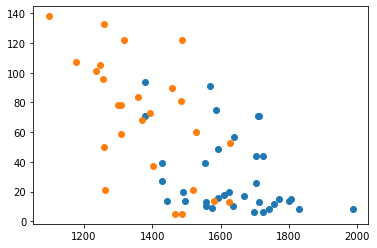

In [32]:
x_n = water_data[water_data["location"] == "North"]['mortality']
x_s = water_data[water_data["location"] == "South"]['mortality']
y_n = water_data[water_data["location"] == "North"]['hardness']
y_s = water_data[water_data["location"] == "South"]['hardness']

plot.scatter(x_n, y_n)
plot.scatter(x_s, y_s)